<a href="https://colab.research.google.com/github/NKDevi-maker/newone/blob/main/ML_End_to_End_Business_Case_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Download the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12, 10)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse


from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import pandas as pd
from sklearn.impute import SimpleImputer as Imputer
from random import choices
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.base import BaseEstimator


In [ ]:
!gdown 1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9

Downloading...
From: https://drive.google.com/uc?id=1F9aD344ifJiKzRDlR4ZX0e4plDuP9-b9
To: /content/kaggle_houseprices_modified.csv
100% 459k/459k [00:00<00:00, 42.2MB/s]


In [ ]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [ ]:
ds = pd.read_csv('/content/kaggle_houseprices_modified.csv')
ds.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,198075.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,199650.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,212325.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,237500.0


In [ ]:
ds.select_dtypes('object').columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [ ]:
todrop = ['Id']


categorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
               'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl', 'HouseStyle',
               'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir',
               'Electrical', 'GarageType', 'PavedDrive', 'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition']


continuous = ['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'BsmtFinSF1',
              'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'MasVnrArea',
              'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
              'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'SalePrice']



cat_to_con = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
              'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
              'PoolQC', ]

<Axes: ylabel='Frequency'>

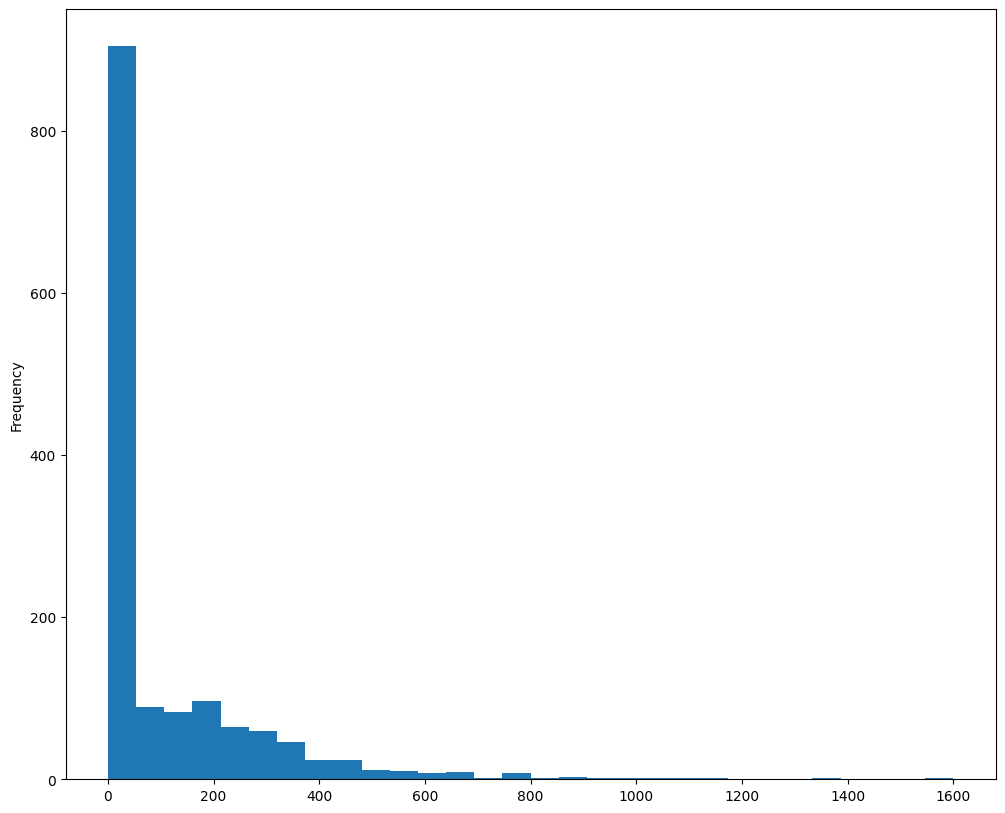

In [ ]:
ds['MasVnrArea'].plot(kind='hist', bins=30)

In [ ]:
ds.isna().sum()

,0
Id,0
MSSubClass,0
MSZoning,0
LotFrontage,259
LotArea,0
Street,0
Alley,1369
LotShape,0
LandContour,0
Utilities,0


In [ ]:
ds['LotFrontage'] = ds['LotFrontage'].fillna(ds['LotFrontage'].median())
ds['MasVnrArea']  = ds['MasVnrArea'].fillna(ds['MasVnrArea'].median())
ds['GarageYrBlt'] = ds['GarageYrBlt'].fillna(ds['GarageYrBlt'].mean())
print(ds[continuous].isna().sum().sum())

0


In [ ]:
ds.shape

(1460, 81)

In [ ]:
ds['Electrical'].value_counts()

,count
Electrical,
SBrkr,1334
FuseA,94
FuseF,27
FuseP,3
Mix,1


In [ ]:
ds['PoolQC'].value_counts()

,count
PoolQC,
Gd,3
Ex,2
Fa,2


In [ ]:
def pre_processing(ds, todrop, categorical, cat_to_con):
  #dropping
  ds = ds.drop(columns=todrop)

  #categorical
  logical_nans = ['Alley', 'Fence', 'MiscFeature', 'MasVnrType', 'GarageType', ]
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')
  ds['Electrical'] = ds['Electrical'].fillna(ds['Electrical'].value_counts().index[0])  # mode
  print("no. of nans in categorical cols:", ds[categorical].isna().sum().sum())


  #cat_to_con
  ds['FireplaceQu'] = ds['FireplaceQu'].fillna('NA')
  logical_nans = ['FireplaceQu', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                  'BsmtFinType2', 'GarageFinish', 'GarageQual', 'GarageCond']
  for col in logical_nans:
      ds[col] = ds[col].fillna('NA')

  ds.drop(columns = ['PoolQC'], inplace=True)
  cat_to_con.remove('PoolQC')
  print("no. of nans in cat_to_con cols:",ds[cat_to_con].isna().sum().sum())

  #target_encoding
  target = 'SalePrice'
  for col in categorical:
      ds[col] = ds.groupby([col])[target].transform('mean')

  #label encoding
  grp1 = ['GarageQual', 'GarageCond', 'FireplaceQu', 'KitchenQual', 'HeatingQC', 'BsmtCond', 'BsmtQual', 'ExterCond', 'ExterQual']
  for col in grp1:
      ds[col] = ds[col].map({'TA': 3, 'Fa': 2, 'NA': 0, 'Gd': 4, 'Po': 1, 'Ex': 5})

  for col in ['BsmtFinType1', 'BsmtFinType2']:
      ds[col] = ds[col].map({'GLQ':6, 'ALQ':5, 'Unf':1, 'Rec':3, 'BLQ':4, 'NA':0, 'LwQ':2})

  ds['BsmtExposure'] = ds['BsmtExposure'].map({'No':1, 'Gd':4, 'Mn':2, 'Av':3, 'NA':0})
  ds['Functional'] = ds['Functional'].map({'Typ':7, 'Min1':6, 'Maj1':3, 'Min2':5, 'Mod':4, 'Maj2':2, 'Sev':1, 'Sal':0})
  ds['GarageFinish'] = ds['GarageFinish'].map({'RFn':2, 'Unf':1, 'Fin':3, 'NA':0})

  print("total nans in the dataframe:", ds.isna().sum().sum())

  return ds

In [ ]:
ds = pre_processing(ds, todrop, categorical, cat_to_con)

no. of nans in categorical cols: 0
no. of nans in cat_to_con cols: 0
total nans in the dataframe: 0


In [ ]:
ds.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,252692.601839,204994.032276,65.0,8450,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,190814.936930,193577.025651,210015.170000,197934.595278,193880.435329,200645.134549,219056.942360,7,5,2003,2003,181503.87511,192839.322908,235349.735437,236023.524504,216457.457191,196.0,4,3,247022.554482,4,3,1,6,706,1,0,150,856,195063.993102,5,200277.221722,200621.358689,856,854,0,1710,1,0,2,1,3,1,4,8,7,0,0,220327.461954,2003.0,2,2,548,3,3,200718.442873,0,61,0,0,0,0,201832.730831,195275.313691,0,184007.670192,2008,175316.452684,177454.242947,198075.0
1,207766.905970,204994.032276,80.0,9600,194047.191231,196590.593755,176882.391676,193292.650229,193813.919842,178829.893617,193577.025651,247145.454545,145434.123457,193880.435329,200645.134549,194232.451377,6,8,1976,1976,181503.87511,192839.322908,156705.416364,157433.138318,164075.809060,0.0,3,3,155761.315615,4,3,4,5,978,1,0,284,1262,195063.993102,5,200277.221722,200621.358689,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,3,220327.461954,1976.0,2,2,460,3,3,200718.442873,298,0,0,0,0,0,201832.730831,195275.313691,0,181414.566176,2007,175316.452684,177454.242947,199650.0
2,252692.601839,204994.032276,68.0,11250,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,190814.936930,193577.025651,210015.170000,197934.595278,193880.435329,200645.134549,219056.942360,7,5,2001,2002,181503.87511,192839.322908,235349.735437,236023.524504,216457.457191,162.0,4,3,247022.554482,4,3,2,6,486,1,0,434,920,195063.993102,5,200277.221722,200621.358689,920,866,0,1786,1,0,2,1,3,1,4,6,7,1,3,220327.461954,2001.0,2,2,608,3,3,200718.442873,0,42,0,0,0,0,201832.730831,195275.313691,0,216298.142857,2008,175316.452684,177454.242947,212325.0
3,174123.741667,204994.032276,60.0,9550,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,193082.861217,193577.025651,221798.864706,197934.595278,193880.435329,200645.134549,219056.942360,7,5,1915,1970,181503.87511,192839.322908,156384.066019,169838.815789,164075.809060,0.0,3,3,139232.477397,3,4,1,5,216,1,0,540,756,195063.993102,4,200277.221722,200621.358689,961,756,0,1717,1,0,1,0,3,1,4,7,7,1,4,143816.497933,1998.0,1,3,642,3,3,200718.442873,0,35,272,0,0,0,201832.730831,195275.313691,0,184007.670192,2006,175316.452684,146527.787129,140000.0
4,252692.601839,204994.032276,84.0,14260,194047.191231,196590.593755,219936.183574,193292.650229,193813.919842,178829.893617,193577.025651,322884.697561,197934.595278,193880.435329,200645.134549,219056.942360,8,5,2000,2000,181503.87511,192839.322908,235349.735437,236023.524504,216457.457191,350.0,4,3,247022.554482,4,3,3,6,655,1,0,490,1145,195063.993102,5,200277.221722,200621.358689,1145,1053,0,2198,1,0,2,1,4,1,4,9,7,1,3,220327.461954,2000.0,2,3,836,3,3,200718.442873,192,84,0,0,0,0,201832.730831,195275.313691,0,197798.869492,2008,175316.452684,177454.242947,237500.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
ds_scaled = scaler.fit_transform(ds)

In [ ]:
ds_scaled[:5]

array([[ 1.29689538,  0.35236535, -0.22087509, -0.20714171,  0.06423821,
         0.21211498, -0.73505855, -0.03169004,  0.02618016, -0.26203422,
        -0.19516997,  0.22563685,  0.24991341,  0.0070423 ,  0.31931461,
         1.04914711,  0.65147924, -0.51719981,  1.05099379,  0.87866809,
        -0.4895745 , -0.07201191,  1.05626179,  1.06754376,  0.48983262,
         0.51410389,  1.05230219, -0.23811236,  1.10681539,  0.58316783,
         0.11788424, -0.59055465,  1.16471151,  0.57542484, -0.27718931,
        -0.28865283, -0.94459061, -0.45930254,  0.11637601,  0.89117944,
         0.26381257,  0.30277452, -0.79343379,  1.16185159, -0.12024172,
         0.37033344,  1.10781015, -0.24106104,  0.78974052,  1.22758538,
         0.16377912, -0.21145358,  0.73599434,  0.91220977,  0.23704355,
        -0.95122649, -1.00833355,  0.52172622,  1.02115667,  0.31847458,
         0.31172464,  0.35100032,  0.26254202,  0.26561805,  0.29517465,
        -0.75217584,  0.21650316, -0.3593249 , -0.1

In [ ]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = LinearRegression()
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))


# try models like linear reg, DT, RF, GBDT

1.4964614636718642e+16
2589367700.377713


In [ ]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = RandomForestRegressor()
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))


35180.67407859413
0.10600762124454972


In [ ]:
X = ds_scaled[:, :-1]
y = ds['SalePrice'].values

kf = KFold(n_splits=5)


y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))
print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

31247.553546371884
0.10183201832527854


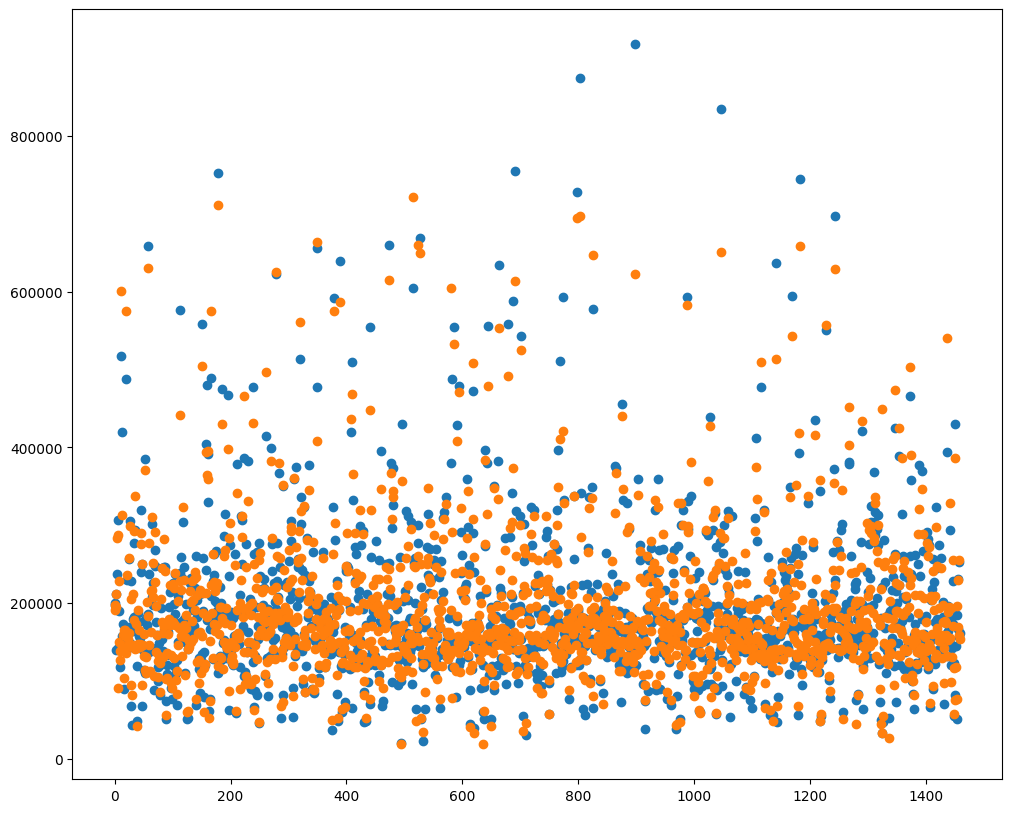

In [ ]:
plt.scatter(range(len(y_true)), y_true)
plt.scatter(range(len(y_true)), y_pred)

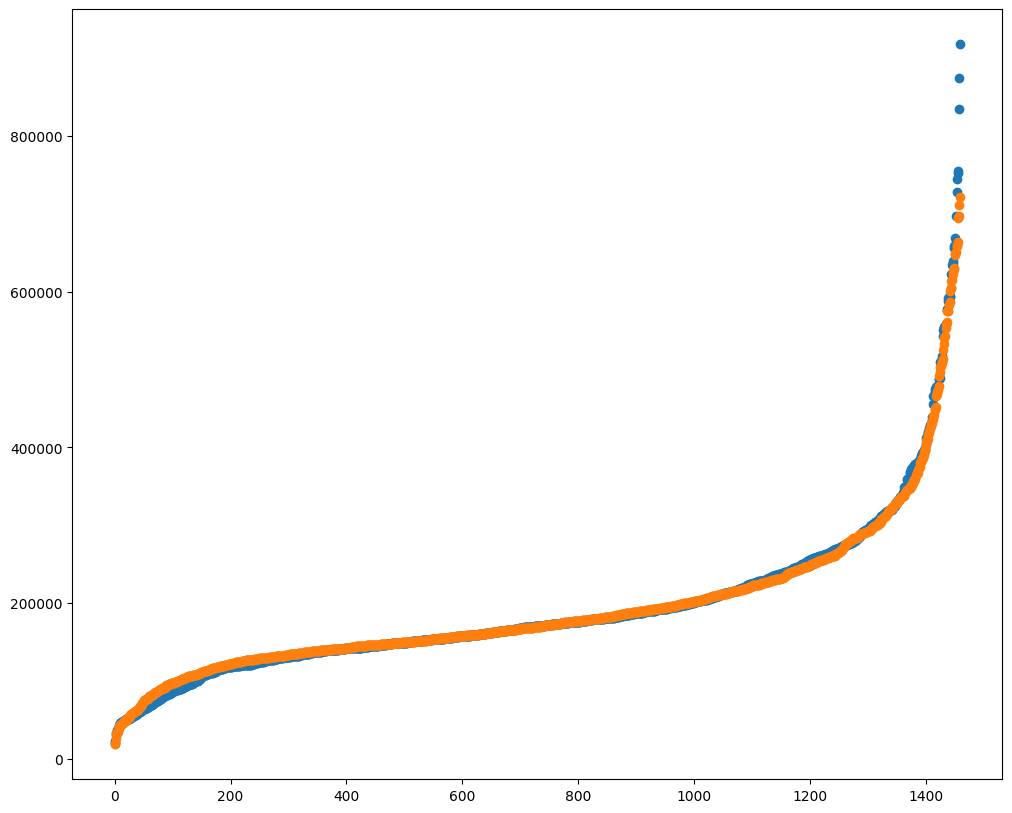

In [ ]:
# another way of visualising
plt.scatter(range(len(y_true)), sorted(y_true))
plt.scatter(range(len(y_true)), sorted(y_pred))

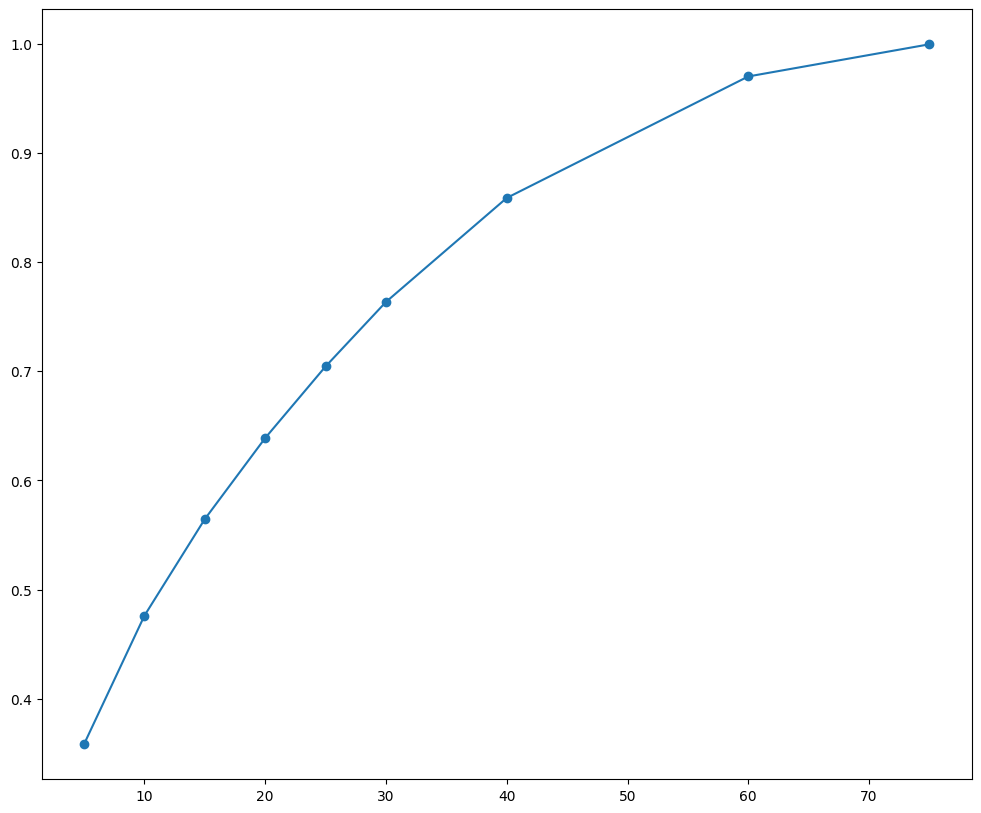

In [ ]:
from sklearn.decomposition import PCA

cs = [5, 10, 15, 20, 25, 30, 40, 60, 75]
info = []
for i in cs:
  pca = PCA(n_components=i)
  pca.fit(ds_scaled[:, :-1])
  info.append(pca.explained_variance_ratio_.sum())

plt.plot(cs, info, '-o')

In [ ]:
pca = PCA(n_components=60)
Xpca = pca.fit_transform(ds_scaled[:, :-1])
y = ds['SalePrice']

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = Xpca[train_index], Xpca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5)
print(mape(y_true, y_pred))

35463.74778533425
0.1129806108596343


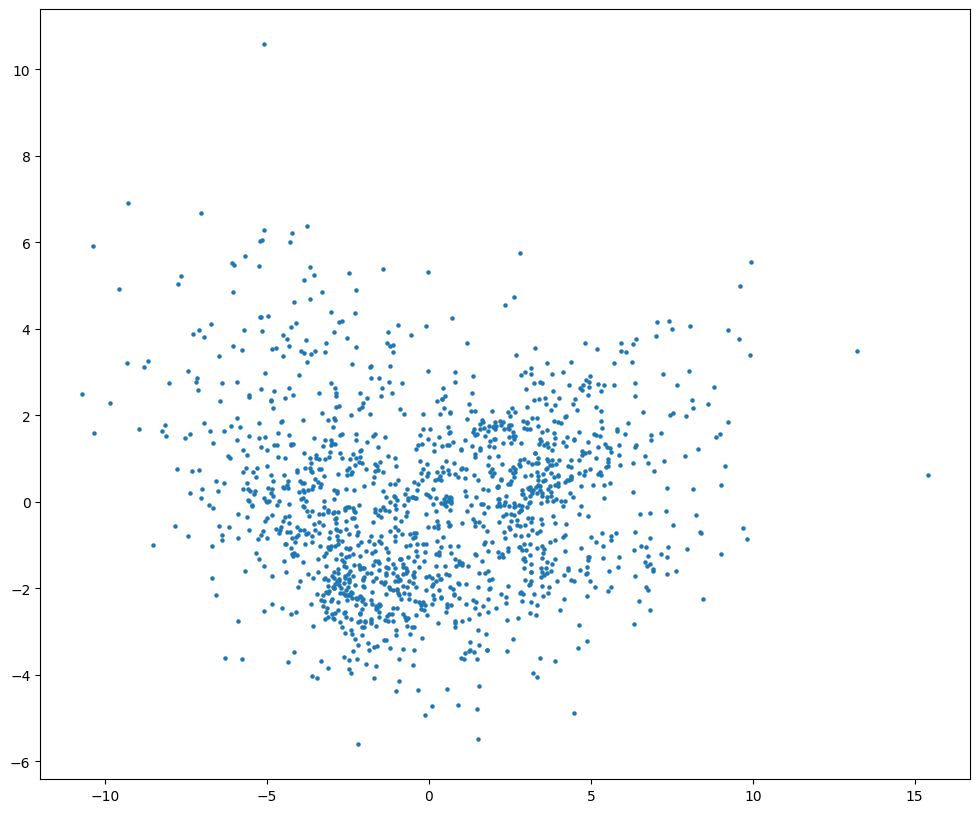

In [ ]:
pca = PCA(n_components=2)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:, 0], vis[:, 1], s = 5)

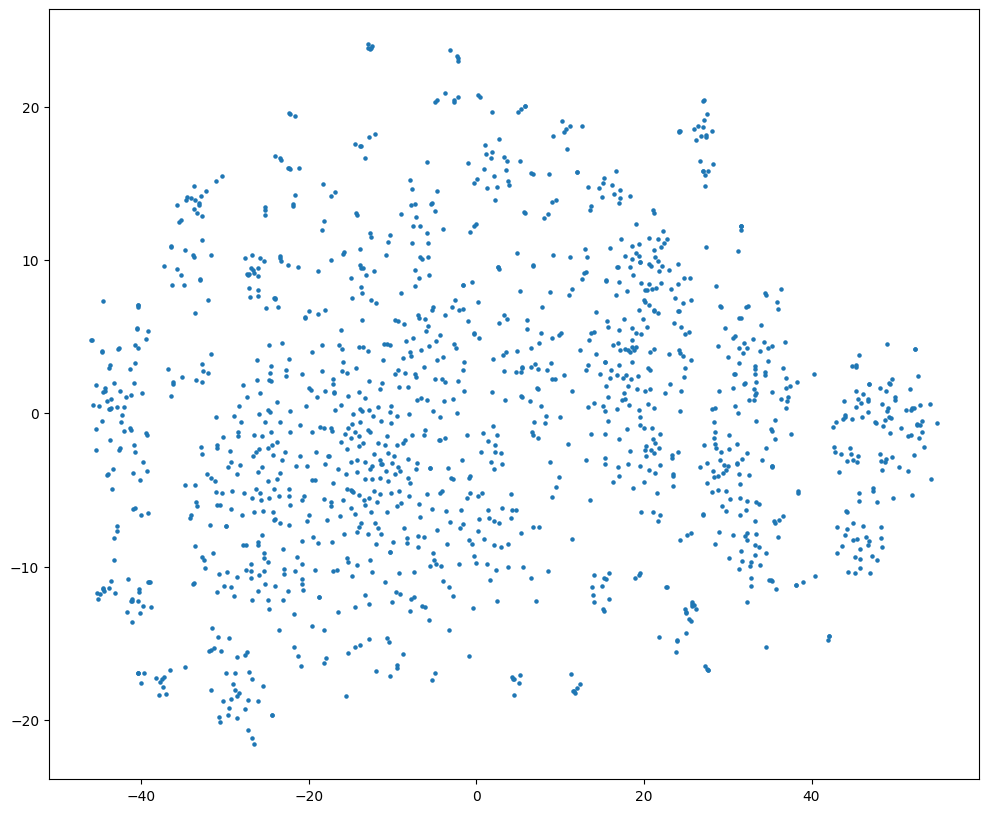

In [ ]:
from sklearn.manifold import TSNE

pca = TSNE(n_components=2, perplexity=50, random_state=0)
vis = pca.fit_transform(ds_scaled[:, :-1])
plt.scatter(vis[:,0], vis[:,1], s=5)

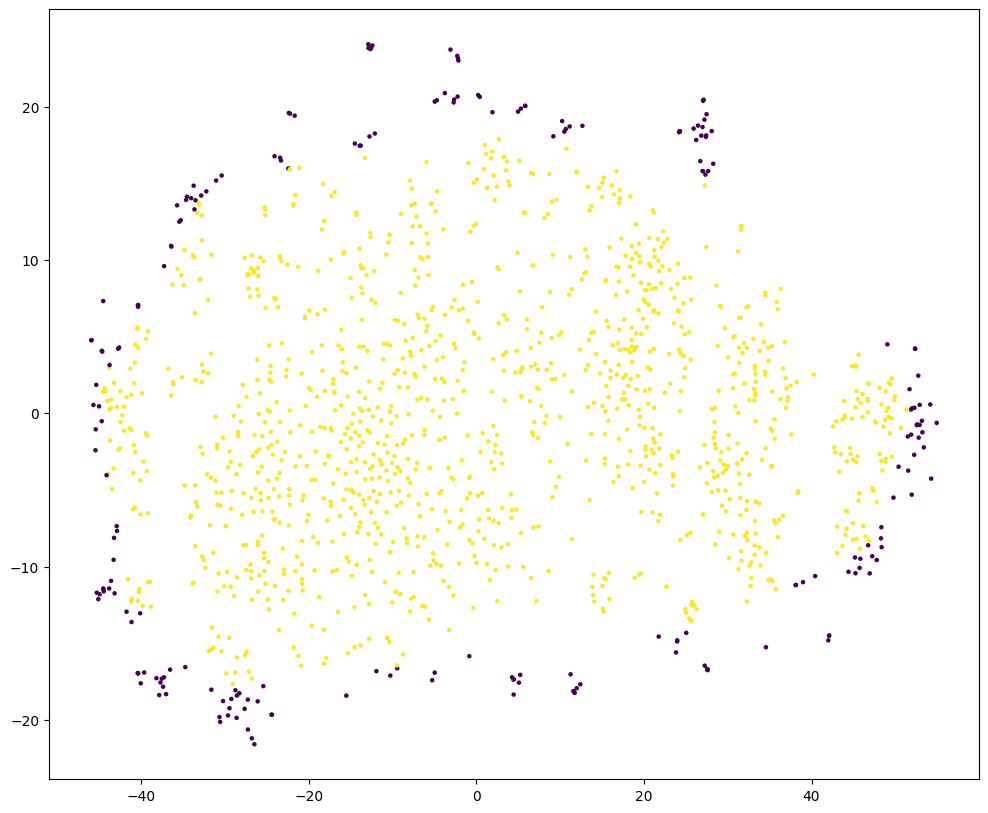

In [ ]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

is_outlier = IsolationForest(contamination=0.15, random_state=0,
                            n_estimators=1000).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

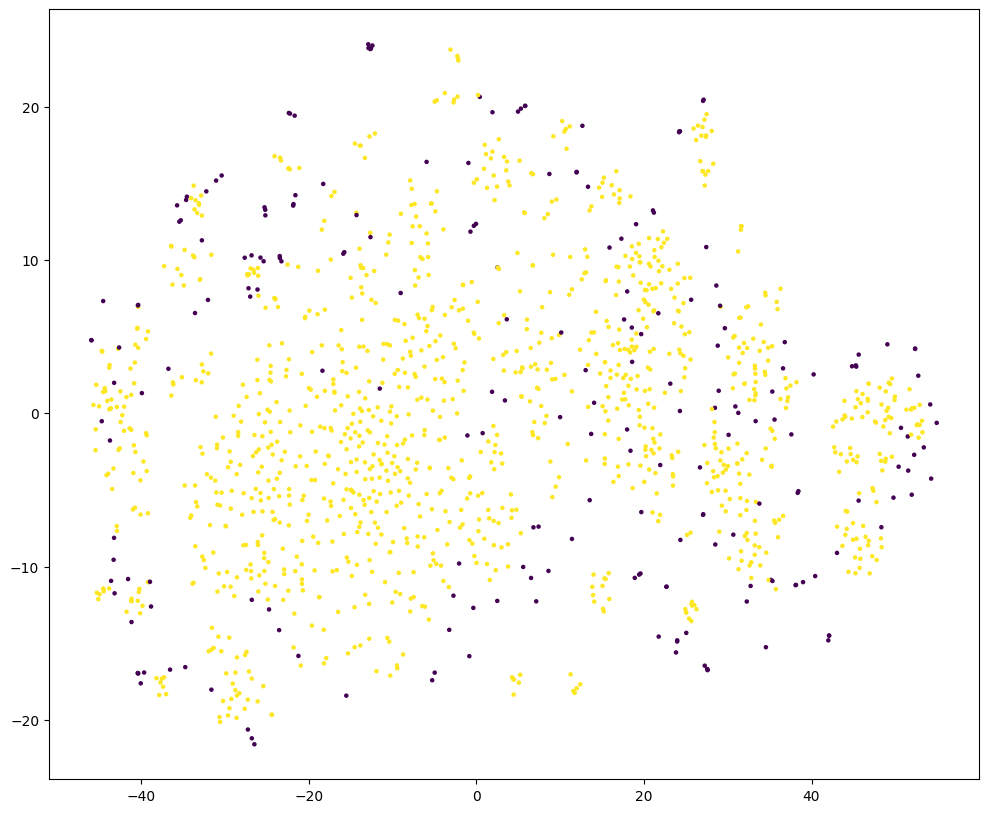

In [ ]:
is_outlier = LocalOutlierFactor(contamination=0.15, n_neighbors=5).fit_predict(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=is_outlier)
plt.show()

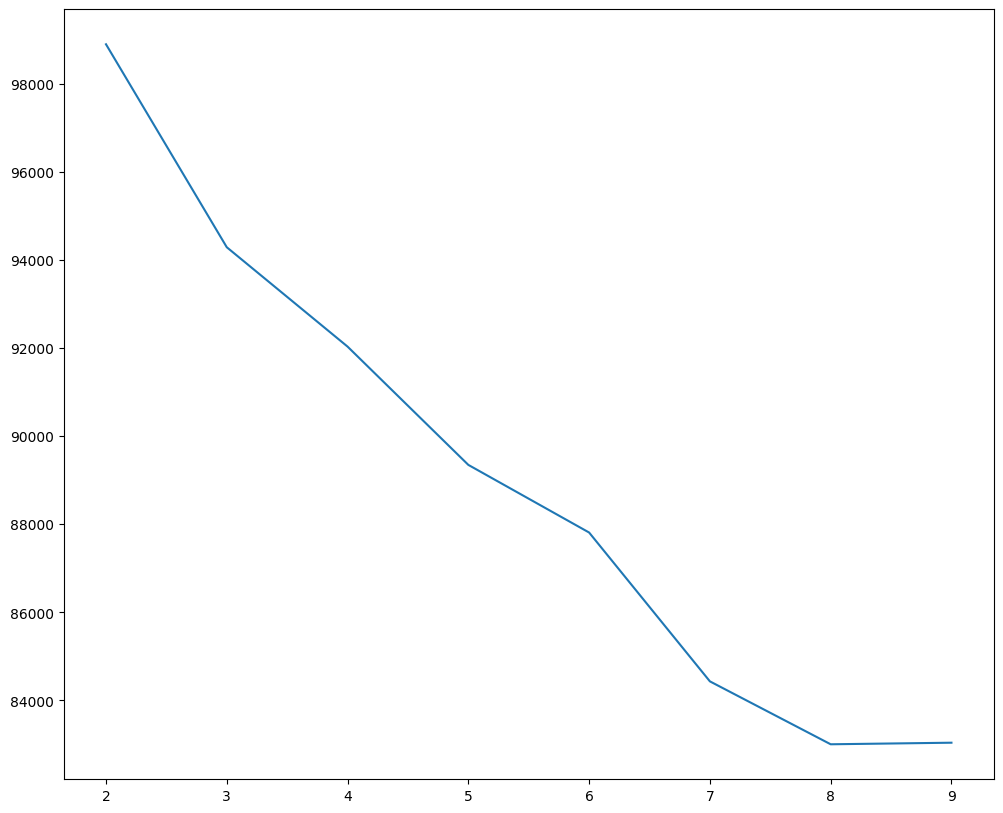

In [ ]:
from sklearn.cluster import KMeans

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(ds_scaled[:, :-1])
  elbow.append(kmeans.inertia_)

plt.plot(range(2,10), elbow)

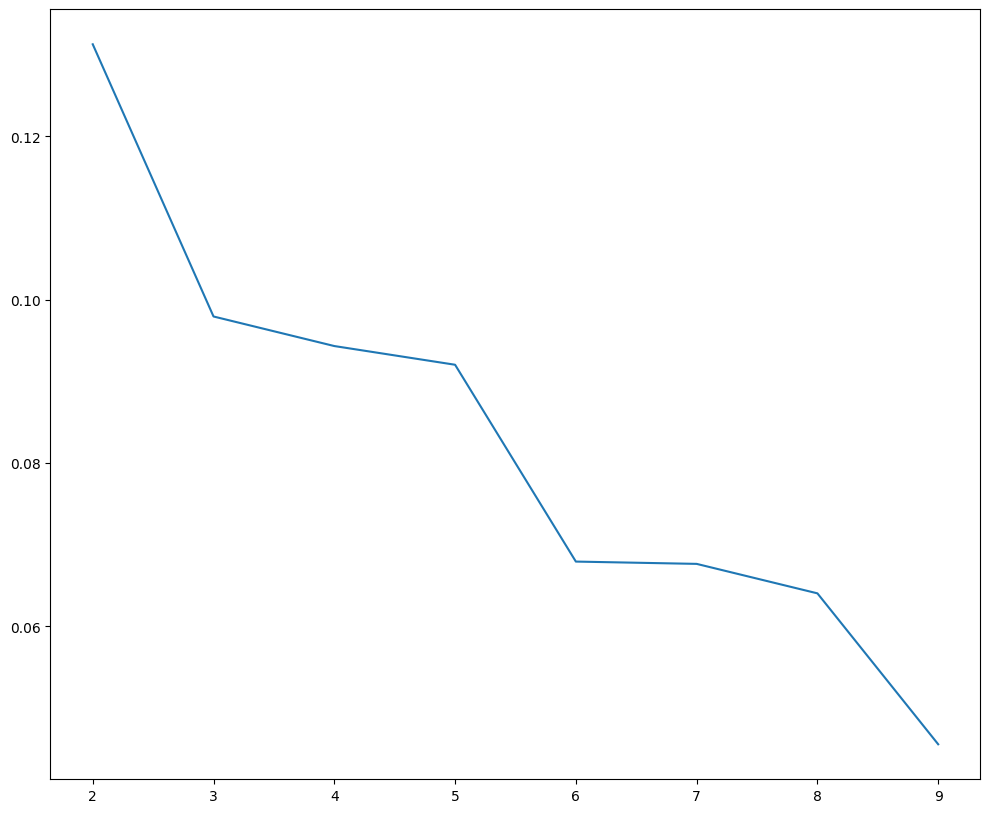

In [ ]:
from sklearn.metrics import silhouette_score

elbow = []
for k in range(2,10):
  kmeans = KMeans(n_clusters=k)
  kmeans.fit(ds_scaled[:, :-1])
  elbow.append(silhouette_score(ds_scaled[:, :-1], kmeans.labels_))

plt.plot(range(2,10), elbow)

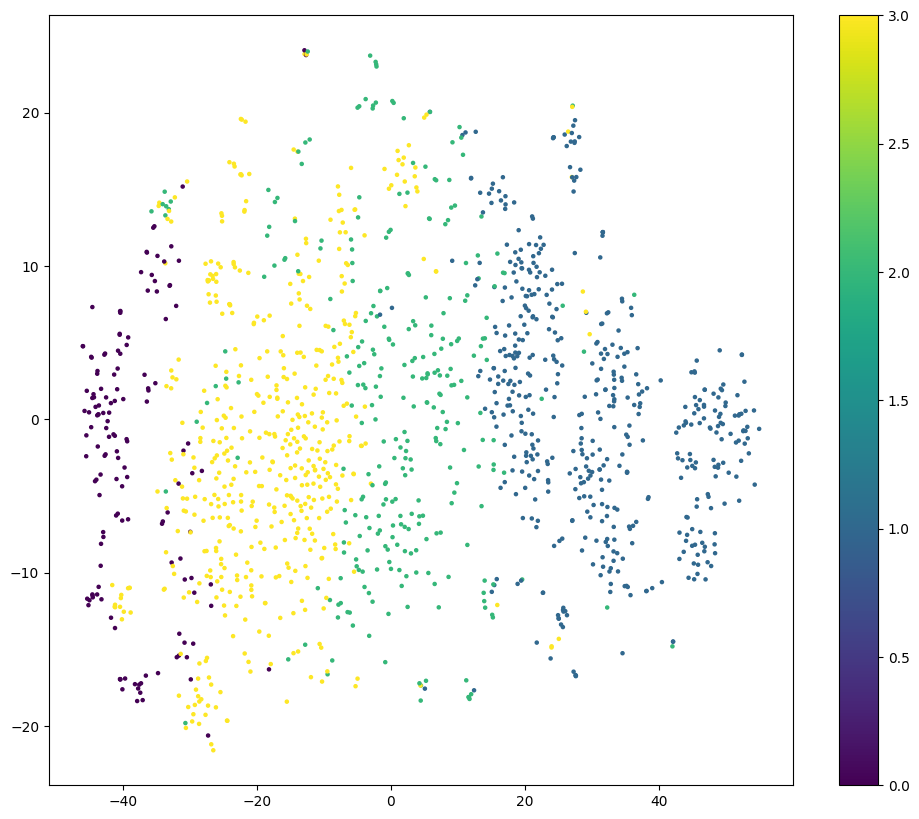

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(ds_scaled[:, :-1])
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=kmeans.labels_)
plt.colorbar()

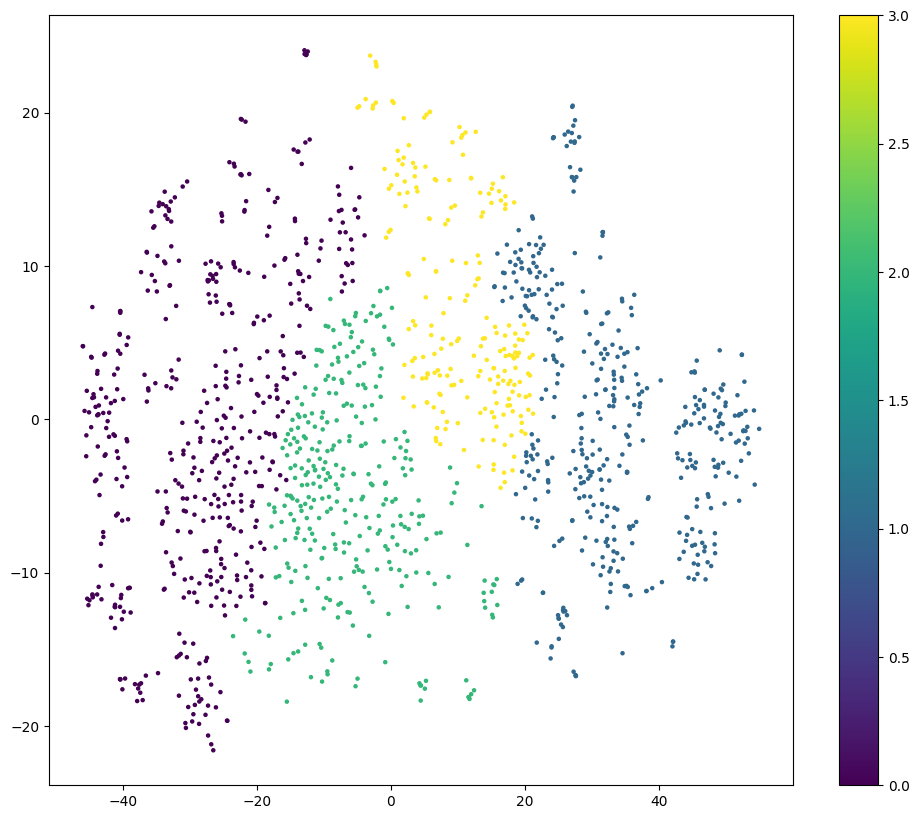

In [ ]:
from sklearn.cluster import AgglomerativeClustering
hierar = AgglomerativeClustering(n_clusters=4,linkage='ward').fit(vis)
plt.scatter(vis[:, 0], vis[:, 1], s=5, c=hierar.labels_)
plt.colorbar()

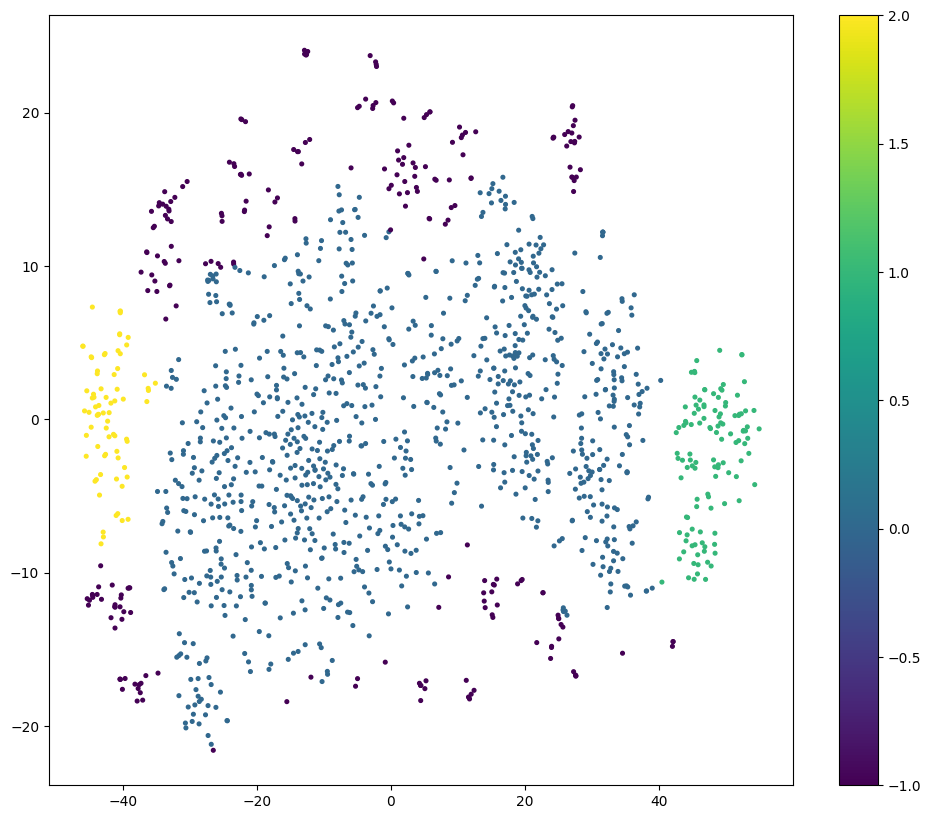

In [ ]:
from sklearn.cluster import DBSCAN
dbsc = DBSCAN(eps = 5.5, min_samples = 45).fit(vis)
plt.scatter(vis[:,0], vis[:,1], s=7, c=dbsc.labels_)
plt.colorbar()

In [ ]:
print("Global Mean: ", ds.SalePrice.mean())


Global Mean:  193784.76647260276


In [ ]:
ds.groupby(dbsc.labels_)['SalePrice'].mean()

,SalePrice
-1,170881.131301
0,183754.529512
1,415950.678261
2,63598.378378


### Next

In [ ]:
# Predicting on normal scale after removing the outliers

c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = ds['SalePrice'].values[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, y_test)
    y_pred = np.append(y_pred, baseline_estimator.predict(X_test))

print(mse(y_true, y_pred)**0.5,  mape(y_true, y_pred))

29045.654610219968 0.09315276215579325


In [ ]:
outliers_X = ds_scaled[dbsc.labels_==-1][:, :-1]
outliers_y = ds[dbsc.labels_==-1]['SalePrice'].values
print(mse(outliers_y, baseline_estimator.predict(outliers_X))**0.5)
print(mape(outliers_y, baseline_estimator.predict(outliers_X)))

56889.35872739812
0.17604256392506934


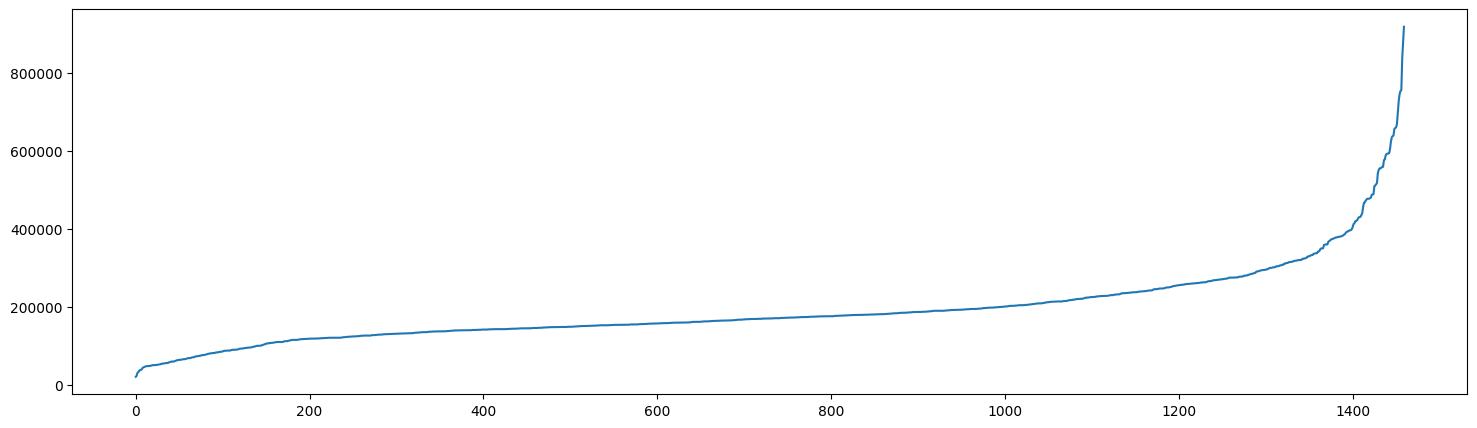

In [ ]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(ds.SalePrice))

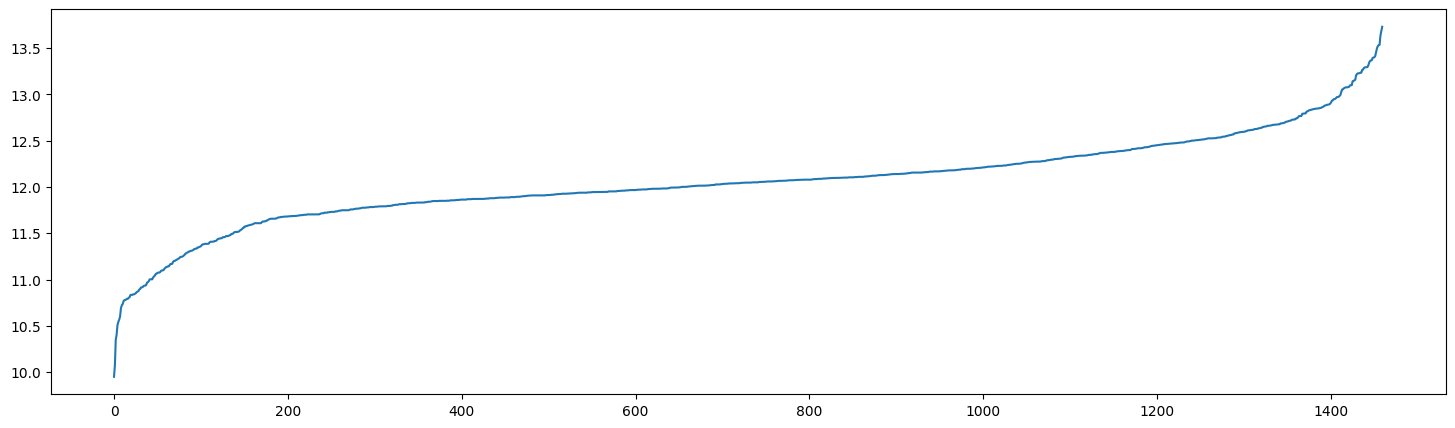

In [ ]:
plt.figure (figsize=(18, 5))
plt.plot(sorted(np.log(ds.SalePrice)))


In [ ]:
# Predicting on log scale to reduce the range and outlier removal

c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    baseline_estimator = GradientBoostingRegressor(random_state=0)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

28666.863707497607 0.08866869210476316


In [ ]:
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0
for cluster in range(3):
    y_true, y_pred = np.array([]), np.array([])
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        c_train, c_test = c[train_index], c[test_index]
        estimator = GradientBoostingRegressor(random_state=0)
        estimator.fit(X_train, y_train)
        y_true = np.append(y_true, np.exp(y_test[c_test==cluster]))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test[c_test==cluster])))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)


0 mse : 19816.761922616985 mape: 0.08049109534600606
1 mse : 71077.65466527548 mape: 0.11480108580937361
2 mse : 13826.379140021969 mape: 0.16132830564119366
56337873.323500946 0.08866869210476318


In [ ]:
mses = []
mapes = []
n = 0

dbsc_merged = pd.Series(dbsc.labels_).copy()
dbsc_merged.loc[dbsc_merged == 0] = 1
dbsc_merged.loc[dbsc_merged == 1] = 1

estimators = [GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)]
final_estimator = LinearRegression()

for cluster in range(1,3):
    X = ds_scaled[dbsc_merged==cluster][:, :-1]
    y = np.log(ds['SalePrice'].values)[dbsc_merged==cluster]
    estimator = GradientBoostingRegressor(random_state=0)
    # estimator = stacking(estimators, final_estimator)
    kf = KFold(n_splits=5)

    y_true, y_pred = np.array([]), np.array([])
    _ = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        estimator.fit(X_train, y_train)
        _.append(mse(np.exp(y_train), np.exp(estimator.predict(X_train))))
        y_true = np.append(y_true, np.exp(y_test))
        y_pred = np.append(y_pred, np.exp(estimator.predict(X_test)))
    print(sum(_)/len(_))
    mses.append(mse(y_true, y_pred)*len(y_true)**0.5)
    mapes.append(mape(y_true, y_pred)*len(y_true))
    n+=len(y_true)

    print(cluster, 'mse :', mse(y_true, y_pred)**0.5, 'mape:',mape(y_true, y_pred))

print(sum(mses)/n, sum(mapes)/n)

256928370.67260617
2 mse : 28666.863707497607 mape: 0.08866869210476316
23585822.178286914 0.08866869210476316


### Additional Ideas

In [ ]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=50,random_state=42)),
    ('gbdt', GradientBoostingRegressor(n_estimators=50, learning_rate=0.6,max_depth=1, random_state=0)),
    ('knn', KNeighborsRegressor(n_neighbors=7))
]
final_estimator = LinearRegression()

In [ ]:
#custom stacking
class stacking(BaseEstimator):
  def __init__(self, estimators, final_estimator):
      self.estimators = estimators
      self.final_estimator = final_estimator


  def fit(self, X, y=None):
        for estimator in self.estimators:
            estimator[1].fit(X, y)

        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        self.final_estimator.fit(pred_features, y)

  def predict(self, X):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.predict(pred_features)

  def score(self, X, y):
        pred_features = np.array([estimator[1].predict(X) for estimator in self.estimators]).T
        return self.final_estimator.score(pred_features, y)
c = dbsc.labels_!=-1
X = ds_scaled[:, :-1][c]
y = np.log(ds['SalePrice'].values)[c]
c = dbsc.labels_[dbsc.labels_!=-1]

kf = KFold(n_splits=5)

mses = []
mapes = []
n = 0

y_true, y_pred = np.array([]), np.array([])
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    c_train, c_test = c[train_index], c[test_index]
    # baseline_estimator = GradientBoostingRegressor(random_state=0)
    baeline_estimator = StackingRegressor(estimators, final_estimator)
    baseline_estimator.fit(X_train, y_train)
    y_true = np.append(y_true, np.exp(y_test))
    y_pred = np.append(y_pred, np.exp(baseline_estimator.predict(X_test)))

print(mse(y_true, y_pred)**0.5, mape(y_true, y_pred))

28666.863707497607 0.08866869210476316
